In [12]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [13]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f: # opens the style.json file
    style: dict = json.load(f) # loads as a dictionary object

In [14]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='JB-001-D-132_0_A12_5.txt'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_csv(raw_data_filename, sep=" ", header=None) # read data into a pandas dataframe by separating by a space and there is no header

# Output data
raw_data

,0,1
0,399.8693,0
1,399.8762,1
2,399.8831,1
3,399.8901,2
4,399.8970,2
...,...,...
248827,3998.6880,0
248828,3998.7100,0
248829,3998.7321,0
248830,3998.7541,0


In [15]:
# Data preprocessing specific to MALDI
def preprocess(data: pd.DataFrame):
    """Function that applies transformation to the dataframe which will make it ready for plotting. Note, this is specific to MALDI.
    """

    # Rename column names
    data = data.rename(columns={data.columns[0]: "m/z", data.columns[1]: "Intensity (a.u.)"}) # rename the first column to m/z, and the second column to Intensity (a.u.)

    return data

preprocessed_data: pd.DataFrame = preprocess(raw_data) # preprocess the data using the function above
preprocessed_data

,m/z,Intensity (a.u.)
0,399.8693,0
1,399.8762,1
2,399.8831,1
3,399.8901,2
4,399.8970,2
...,...,...
248827,3998.6880,0
248828,3998.7100,0
248829,3998.7321,0
248830,3998.7541,0


/var/folders/ff/8h_dksfn11xfp_fq0srryncc0000gn/T/ipykernel_44272/1595882943.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


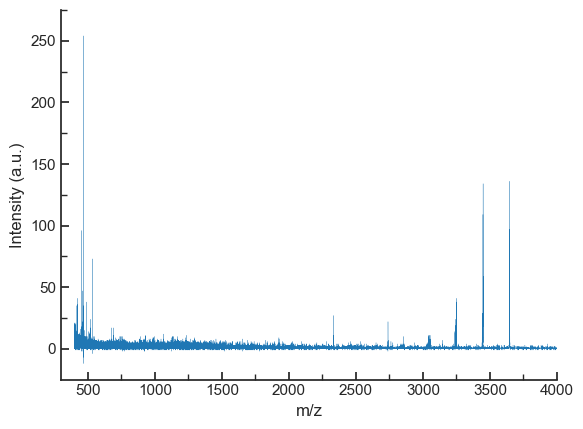

In [16]:
# Plot the data!
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # gives the blank white background theme and sets size of figure
# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="m/z", # refers to column header to get all the X data
    y="Intensity (a.u.)", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["maldi"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["maldi"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X-axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y-axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(300, 4000)
# NOTE: User can change the y limits here
plt.ylim(-25, 275)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("UV-Vis.svg", dpi=300, bbox_inches="tight")
plt.savefig("UV-Vis.jpg", dpi=300, bbox_inches="tight")